### Strassen's Algorithm & Naive Matrix Multiplication
#### Josh Park

#### Introduction
- What is Matrix Multiplication?
    - The definition of matrix multiplication is that if C = AB for an n × m matrix A and an m × p matrix B, then C is an n × p matrix with entries.
- Example of Matrix Multiplication
- "Suppose you were given two NxN matrices, let's call them A and B, and asked to produce the resulting multiplicative matrix C. How would you do it"

#### Methodologies (Algorithms)
- Naive Approach O(N^3) "Initially, we could take a naive approach - Just..."
- Strassen's Algorithm O(N^2.8) "Then came Strassen, pushing the boundaries and optimizing just a little further."

#### What do we observe at Small Values?
- Discuss what we observe from each of the algorithms at small values.

#### What about Large Values?
- Discuss what we observe from each of the algorithms at large values.

#### Remarks
- Talk about each of the algorithms and their pain points.
- Bring up a valid use case for each of them, unless one just gets beaten out (naive?)

#### References
- List sources

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import time

#### Helper Methods

Below are some helper functions to clean up the code a little and reuse some of the recurring functionality.

- create_matrix: Takes the edge_length, N, and returns an NxN numpy matrix
- plot_output: Takes the title, x values, and y values as input and generates the appropriate scatterplot

In [15]:
def create_matrix(edge_length: int) -> np.matrix:
    return np.random.randint(50, size=(edge_length,edge_length))

def plot_output(plt_title: str, x_values: list, y_values: list) -> None:
    plt.figure(figsize=(10,10))
    plt.scatter(x_values, y_values, color= "blue")

    plt.xlabel('No. Iterations')
    plt.ylabel('Runtime') 

    plt.title(plt_title)
    sns.set_theme()

    z = np.polyfit(x_values, y_values, 3)
    p = np.poly1d(z)

    plt.plot(x_values, p(x_values))
    
    plt.show()

#### Naive Matrix Multiplication

Suppose you were given two NxN matrices, let's call them A and B, and asked to produce the resulting multiplicative matrix C. How would you do it?
Let's say we opened up our textbooks and found the mathematic rules around matrix multiplication, we could implement this algorithm as follows.

- Input: matrices A and B

- Let C be a new matrix of the appropriate size

- For i from 1 to n:
    - For j from 1 to p:
        - Let sum = 0
        - For k from 1 to m:
            - Set sum ← sum + Aik × Bkj
            - Set Cij ← sum
- Return C

In [16]:
def naive(A: np.matrix, B: np.matrix) -> np.matrix:
    C = np.zeros((len(A), len(A)), dtype = int)
    N = len(A)

    for i in range(N):
        for j in range(N):
            for k in range(N):
                C[i][j] += A[i][k]*B[k][j]

    return C

def time_naive(input_size: int) -> None:
    matrix = create_matrix(input_size)
    start = time.time()

    naive(matrix, matrix)

    return time.time() - start

def test_naive(max_runs: int) -> None:
    iterations = []
    runtimes = []

    for n in range(10, max_runs, 10):

        runtime = time_naive(n)
        
        iterations.append(n)
        runtimes.append(runtime)

    plot_output('Naive Algorithm', x_values=iterations, y_values=runtimes)

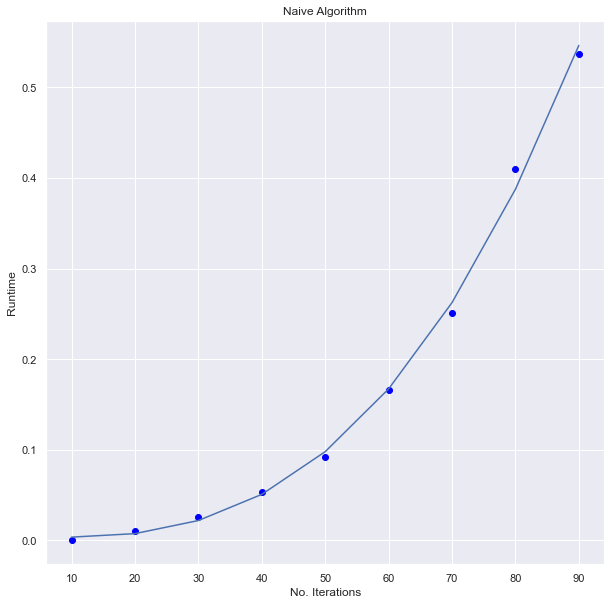

In [17]:
test_naive(100)

#### Strassen's Algorithm

Tired of sitting around waiting for his matrices to compute for far too long, Volker Strassen an esteemed German mathematician developed an algorithm that reduces the runtime complexity of multiplaying two matrices.

We recursively iterate this division process until the submatrices degenerate into numbers (elements of the ring R). If, as mentioned above, the original matrix had a size that was not a power of 2, then the resulting product will have zero rows and columns just like A and B, and these will then be stripped at this point to obtain the (smaller) matrix C we really wanted.

Practical implementations of Strassen's algorithm switch to standard methods of matrix multiplication for small enough submatrices, for which those algorithms are more efficient. The particular crossover point for which Strassen's algorithm is more efficient depends on the specific implementation and hardware. Earlier authors had estimated that Strassen's algorithm is faster for matrices with widths from 32 to 128 for optimized implementations.

In this experiment we'll be pushing Strassen's (and unfortunately my poor macbook's hardware) to the limit.

In [ ]:
def split(matrix: np.matrix):
    """
    Splits a given matrix into quarters.
    Input: nxn matrix
    Output: tuple containing 4 n/2 x n/2 matrices corresponding to a, b, c, d
    """
    row, col = matrix.shape
    row2, col2 = row//2, col//2
    
    return matrix[:row2, :col2], matrix[:row2, col2:], \
  		   matrix[row2:, :col2], matrix[row2:, col2:]

def strassen(A: np.matrix, B: np.matrix) -> np.matrix:

    # Base case for 1x1 matrices
    if len(A) == 1:
        return A * B
  
    # Splitting the matrices into quadrants.
    a, b, c, d = split(A)
    e, f, g, h = split(B)
  
    # Computing the products (p1, p2, ..., p7) recursively.
    p1 = strassen(a, f - h)
    p2 = strassen(a + b, h)
    p3 = strassen(c + d, e)
    p4 = strassen(d, g - e)
    p5 = strassen(a + d, e + h)
    p6 = strassen(b - d, g + h)
    p7 = strassen(a - c, e + f)
  
    # Create matrix C by combining the four quadrants
    c11 = p5 + p4 - p2 + p6
    c12 = p1 + p2
    c21 = p3 + p4
    c22 = p1 + p5 - p3 - p7
  
    C = np.vstack((np.hstack((c11, c12)), np.hstack((c21, c22))))
  
    return C

def time_strassen(input_size: int) -> None:
    matrix = create_matrix(input_size)
    start = time.time()

    strassen(matrix, matrix)

    return time.time() - start

def test_strassen(max_runs: int) -> None:
    iterations = []
    runtimes = []

    for n in range(1, max_runs):

        runtime = time_strassen(2**n)

        iterations.append(2**n)
        runtimes.append(runtime)

    plot_output('Strassens Algorithm', x_values=iterations, y_values=runtimes)

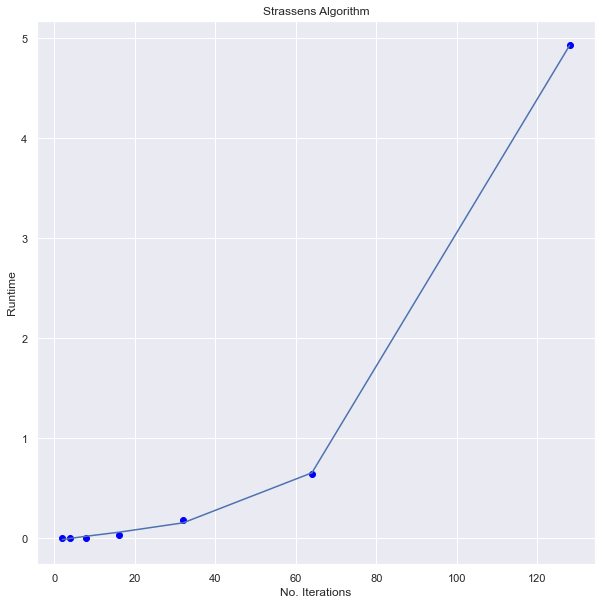

In [19]:
# Note: The max_runs input must be a power of 2
test_strassen(8)

#### Comparing Average Runtimes

- Let's take a look at the average runtimes of both algorithms at both small values, and slightly larger values.
- For the small value case we'll be looking at matrix's of size 64x64
- For the large value case we'll be looking at matrix's of size 1028x1028 (2^10)

For the small value case we'll be using 30 iterations and for the large value case (to spare my poor macbook pro) we'll be running both algorithms 15 times.

In [68]:
def plot_average_runtimes(num_runs: int, input_size: int, time_upper_bound: int) -> None:

    # x : 0 -> num_runs
    # y : runtime
    x_values = []
    naive_times = []
    strassen_times = []

    for i in range(num_runs):
        n = time_naive(input_size)
        s = time_strassen(input_size)

        naive_times.append(n)
        strassen_times.append(s)
        x_values.append(i)

    fig, ax = plt.subplots(1, 2, figsize=(15,10))
    fig.tight_layout()

    ax[0].plot(x_values, naive_times, color='red')
    ax[0].set_title('Naive Average Runtimes')
    ax[0].set_ylim([0, time_upper_bound])

    ax[1].plot(x_values, strassen_times, color='blue')
    ax[1].set_title('Strassen Average Runtimes')
    ax[1].set_ylim([0, time_upper_bound])


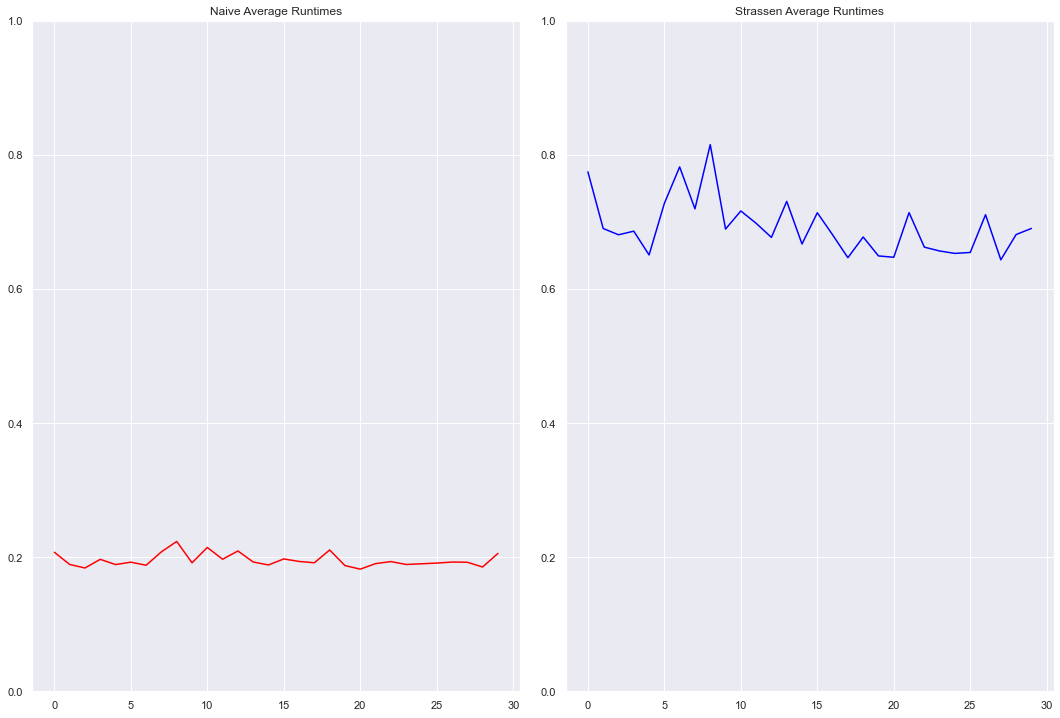

In [69]:
plot_average_runtimes(30, 64, 1)

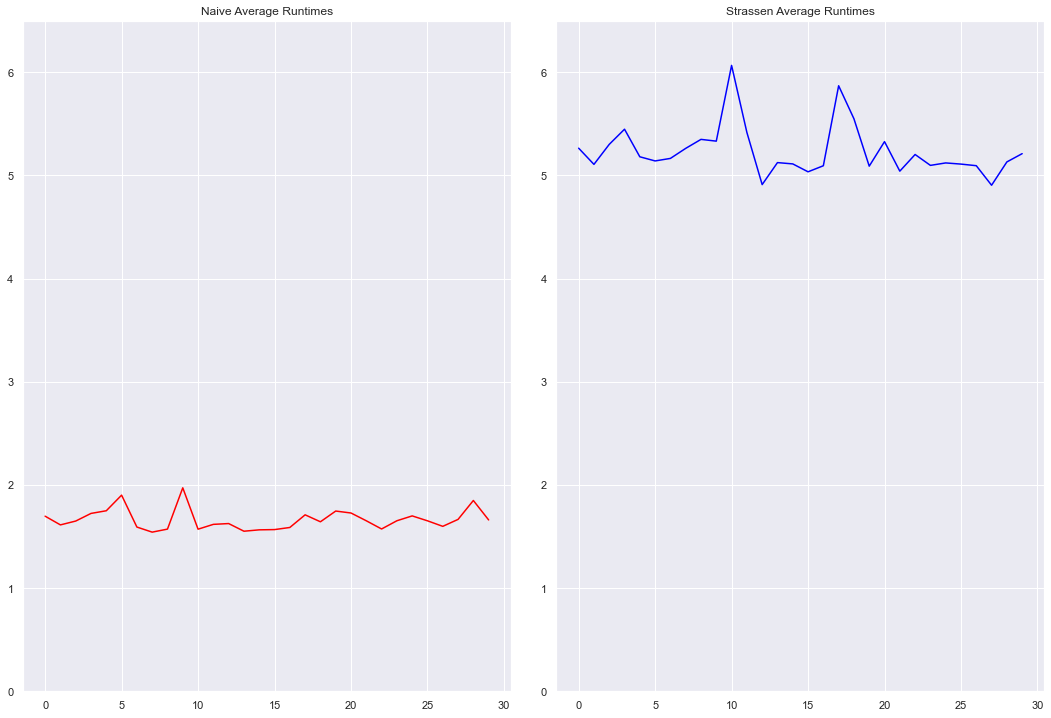

In [73]:
plot_average_runtimes(30, 128, 6.5)

In [74]:
test_naive(1000)

KeyboardInterrupt: 